# Exploratory Data Analysis (EDA):

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
anime_data = pd.read_csv("anime.csv")
rating_data = pd.read_csv("rating.csv")
# Summary statistics
print(anime_data.describe())

           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06


In [46]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [42]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [2]:
# Menampilkan informasi mengenai nilai null pada setiap kolom
print(anime_data.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [47]:
# Menampilkan informasi mengenai nilai null pada setiap kolom
print(rating_data.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


In [3]:
# Menampilkan informasi mengenai nilai NaN pada setiap kolom
print(anime_data.isna().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [49]:
# Menampilkan informasi mengenai nilai NaN pada setiap kolom
print(rating_data.isna().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


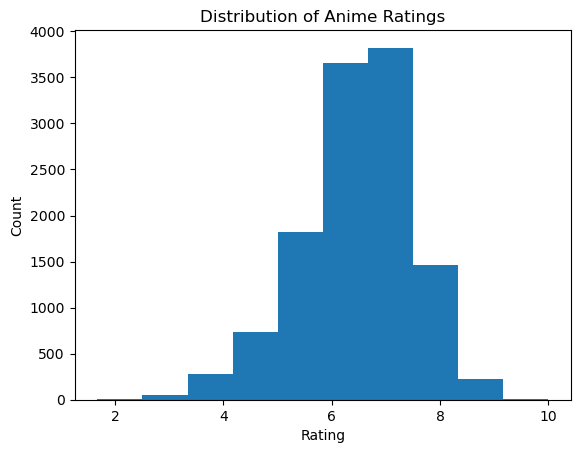

In [4]:
# Distribution of ratings
plt.hist(anime_data["rating"], bins=10)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Anime Ratings")
plt.show()

In [5]:
# Menghitung frekuensi masing-masing jumlah episode
rating_counts = anime_data["rating"].value_counts().reset_index()
rating_counts.columns = ["Number of rating", "Count"]

# Menampilkan data dalam bentuk tabel
rating_counts.head(10)

,Number of rating,Count
0,6.00,141
1,7.00,99
2,6.50,90
3,6.25,84
4,5.00,76
5,6.75,72
6,6.67,68
7,5.67,67
8,6.38,67
9,6.80,67


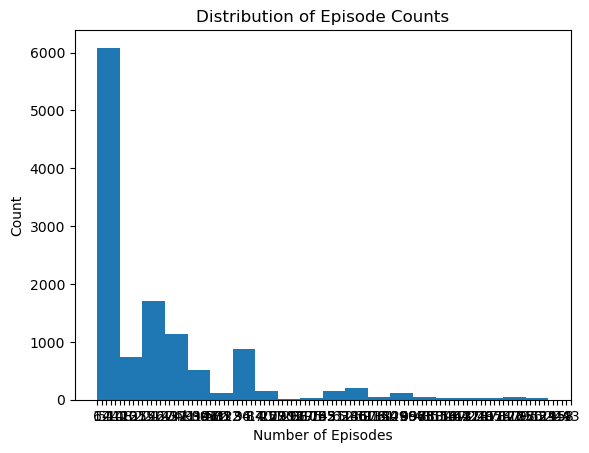

In [6]:
plt.hist(anime_data["episodes"], bins=20, range=(0, 100))
plt.xlabel("Number of Episodes")
plt.ylabel("Count")
plt.title("Distribution of Episode Counts")
plt.show()

In [7]:
# Menghitung frekuensi masing-masing jumlah episode
episode_counts = anime_data["episodes"].value_counts().reset_index()
episode_counts.columns = ["Number of Episodes", "Count"]

# Menampilkan data dalam bentuk tabel
episode_counts.head(10)

,Number of Episodes,Count
0,1,5677
1,2,1076
2,12,816
3,13,572
4,26,514
5,3,505
6,Unknown,340
7,4,327
8,6,268
9,24,181


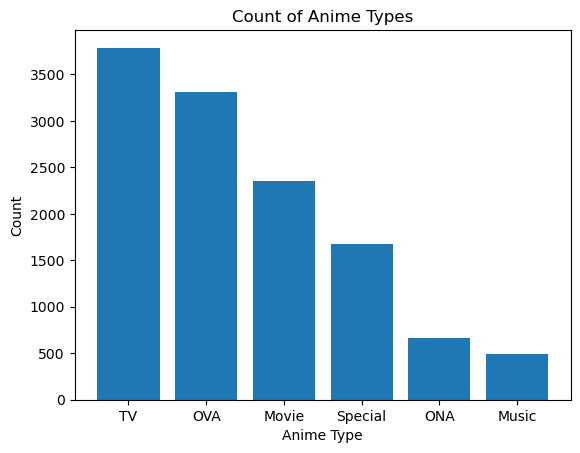

In [8]:
# Count of anime types
type_counts = anime_data["type"].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Anime Type")
plt.ylabel("Count")
plt.title("Count of Anime Types")
plt.show()

In [9]:
# Menghitung frekuensi masing-masing jumlah episode
type_counts = anime_data["type"].value_counts().reset_index()
type_counts.columns = ["Number of type", "Count"]

# Menampilkan data dalam bentuk tabel
type_counts.head(10)

,Number of type,Count
0,TV,3787
1,OVA,3311
2,Movie,2348
3,Special,1676
4,ONA,659
5,Music,488


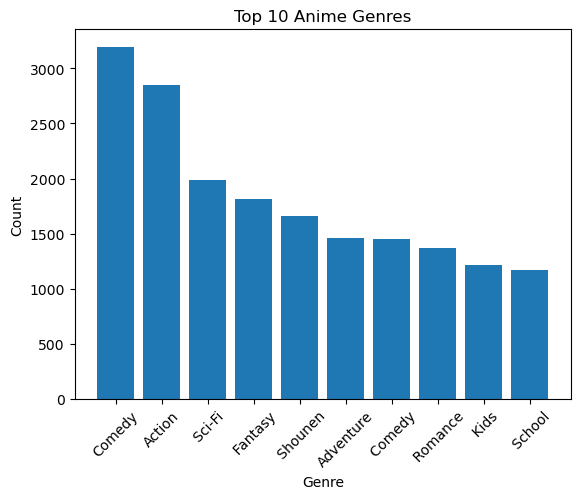

In [10]:
# Genre analysis
genres = anime_data["genre"].str.split(",", expand=True).stack().value_counts()
top_10_genres = genres.head(10)
plt.bar(top_10_genres.index, top_10_genres.values)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Anime Genres")
plt.xticks(rotation=45)
plt.show()

# Data Preparation:

In [11]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## Handling Missing Values:

In [12]:
import numpy as np
# Mengganti nilai "Unknown" dengan NaN
anime_data.replace("Unknown", 0, inplace=True)
# Handling Missing Values
anime_data.dropna(inplace=True)  # Drop rows with missing values


In [13]:
# Menampilkan informasi mengenai nilai null pada setiap kolom
print(anime_data.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [14]:
# Menampilkan informasi mengenai nilai NaN pada setiap kolom
print(anime_data.isna().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


## Encoding Categorical Variables:


In [15]:
# Encoding Categorical Variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(anime_data[["type"]])  # Encode "type" variable
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(["type"]))
anime_data_encoded = pd.concat([anime_data.drop("type", axis=1), encoded_df], axis=1)

C:\Users\TUF-RYZEN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Scaling Numerical Variables:

In [16]:
# Scaling Numerical Variables
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(anime_data_encoded[["rating", "episodes"]])  # Scale "rating" and "episodes" variables
anime_data_scaled = pd.DataFrame(scaled_features, columns=["rating_scaled", "episodes_scaled"])
anime_data_final = pd.concat([anime_data_encoded.drop(["rating", "episodes"], axis=1), anime_data_scaled], axis=1)

## Data Integration:

In [44]:
# Data Integration
anime_data_merged = pd.merge(anime_data_final, rating_data, on="anime_id")


In [40]:
# Dikarenakan jumlah data yang begitu besar, kita dapat mengggunakan sample data sebagai dataset
sampled_data = anime_data_merged.sample(n=1000, random_state=42)

In [83]:
print(anime_data_final.head())

   anime_id                              name  \
0   32281.0                    Kimi no Na wa.   
1    5114.0  Fullmetal Alchemist: Brotherhood   
2   28977.0                          Gintama°   
3    9253.0                       Steins;Gate   
4    9969.0                     Gintama&#039;   

                                               genre   members  type_Movie  \
0               Drama, Romance, School, Supernatural  200630.0         1.0   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...  793665.0         0.0   
2  Action, Comedy, Historical, Parody, Samurai, S...  114262.0         0.0   
3                                   Sci-Fi, Thriller  673572.0         0.0   
4  Action, Comedy, Historical, Parody, Samurai, S...  151266.0         0.0   

   type_Music  type_ONA  type_OVA  type_Special  type_TV  rating_scaled  \
0         0.0       0.0       0.0           0.0      0.0       0.924370   
1         0.0       0.0       0.0           0.0      1.0       0.911164   
2         0

In [84]:
print(anime_data_merged.head())

   anime_id            name                                 genre   members  \
0   32281.0  Kimi no Na wa.  Drama, Romance, School, Supernatural  200630.0   
1   32281.0  Kimi no Na wa.  Drama, Romance, School, Supernatural  200630.0   
2   32281.0  Kimi no Na wa.  Drama, Romance, School, Supernatural  200630.0   
3   32281.0  Kimi no Na wa.  Drama, Romance, School, Supernatural  200630.0   
4   32281.0  Kimi no Na wa.  Drama, Romance, School, Supernatural  200630.0   

   type_Movie  type_Music  type_ONA  type_OVA  type_Special  type_TV  \
0         1.0         0.0       0.0       0.0           0.0      0.0   
1         1.0         0.0       0.0       0.0           0.0      0.0   
2         1.0         0.0       0.0       0.0           0.0      0.0   
3         1.0         0.0       0.0       0.0           0.0      0.0   
4         1.0         0.0       0.0       0.0           0.0      0.0   

   rating_scaled  episodes_scaled  user_id  rating  
0        0.92437          0.00055      

# Modeling and Result:

## Solusi 1: Content-based Filtering


In [39]:
# Import library yang diperlukan:
# TfidfVectorizer dari sklearn.feature_extraction.text: Digunakan untuk mengubah teks menjadi representasi vektor menggunakan metode TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

# linear_kernel dari sklearn.metrics.pairwise: Digunakan untuk menghitung cosine similarity antara vektor-vektor.
from sklearn.metrics.pairwise import linear_kernel

In [30]:
# Menghapus baris dengan nilai genre yang hilang (NaN) dari dataframe 
anime_data_final.dropna(subset=['genre'], inplace=True)

In [31]:
# Membuat TF-IDF matrix:
# Membuat objek TfidfVectorizer() dengan parameter default.
tfidf = TfidfVectorizer()

# Menggunakan objek tfidf untuk mengubah kolom "genre" dari dataframe anime_data_final menjadi representasi vektor TF-IDF menggunakan metode fit_transform().
# Hasilnya disimpan dalam variabel anime_matrix.
anime_matrix = tfidf.fit_transform(anime_data_final["genre"])

In [32]:
# Menghitung cosine similarity:

# Menggunakan metode linear_kernel() untuk menghitung cosine similarity antara vektor-vektor dalam anime_matrix.
# Hasilnya disimpan dalam variabel cosine_sim.
cosine_sim = linear_kernel(anime_matrix, anime_matrix)

In [36]:
# Membuat fungsi get_content_based_recommendations() untuk mendapatkan rekomendasi berdasarkan konten:

def get_content_based_recommendations(title, cosine_sim=cosine_sim, anime_data=anime_data_final, top_n=5): # Menerima parameter title (judul anime yang ingin direkomendasikan), cosine_sim, anime_data, dan top_n (jumlah rekomendasi yang diinginkan).
    # Mengambil indeks anime dengan judul yang sesuai dari dataframe anime_data.
    idx = anime_data[anime_data["name"] == title].index[0]
    
    # Menghitung skor kesamaan pairwise antara anime yang diberikan dengan anime lainnya dari cosine_sim.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Mengurutkan anime berdasarkan skor kesamaan secara menurun.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Mengambil indeks anime teratas (kecuali anime itu sendiri) sesuai dengan jumlah rekomendasi yang diinginkan.
    top_anime_indices = [i[0] for i in sim_scores[1:top_n+1]]
    
    # Mengembalikan judul anime dan genre rekomendasi dalam dataframe.
    return anime_data.loc[top_anime_indices, ["name", "genre"]]

In [37]:
# Menggunakan fungsi get_content_based_recommendations() untuk mendapatkan rekomendasi berdasarkan konten untuk judul anime "Naruto".
# Hasil rekomendasi disimpan dalam variabel content_based_recommendations.
anime_title = "Naruto"
content_based_recommendations = get_content_based_recommendations(anime_title)
if content_based_recommendations is not None:
    print("Content-based Recommendations for", anime_title)
    print(content_based_recommendations)

Content-based Recommendations for Naruto
                                                   name                                              genre
615                                  Naruto: Shippuuden  Action, Comedy, Martial Arts, Shounen, Super P...
841                                              Naruto  Action, Comedy, Martial Arts, Shounen, Super P...
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...  Action, Comedy, Martial Arts, Shounen, Super P...
1343                                        Naruto x UT  Action, Comedy, Martial Arts, Shounen, Super P...
1472        Naruto: Shippuuden Movie 4 - The Lost Tower  Action, Comedy, Martial Arts, Shounen, Super P...


## Solusi 2: Collaborative Filtering

In [96]:
# Menggunakan library surprise untuk melakukan Collaborative Filtering.
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split

In [97]:
# Membuat objek Reader dengan menyebutkan skala rating yang digunakan.
reader = Reader(rating_scale=(1, 10))
# Membuat Dataset menggunakan load_from_df() dengan memasukkan data pengguna, anime, dan rating dari dataframe sampled_data.
data = Dataset.load_from_df(sampled_data[["user_id", "anime_id", "rating"]], reader)

In [98]:
# Memisahkan dataset menjadi train set dan test set menggunakan train_test_split(), dengan proporsi 80:20.
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [99]:
# Membuat model Collaborative Filtering menggunakan KNNBasic().
model = KNNBasic()
# Melatih model menggunakan fit() dengan menggunakan train set.
model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [100]:
# Membuat fungsi get_collaborative_filtering_recommendations() untuk mendapatkan rekomendasi berdasarkan Collaborative Filtering untuk pengguna tertentu.
# Memasukkan user_id, model Collaborative Filtering, data anime, dan jumlah rekomendasi yang diinginkan.
def get_collaborative_filtering_recommendations(user_id, model=model, anime_data=anime_data_final, top_n=5):
    # Untuk setiap anime_id yang ada, melakukan prediksi rating pengguna menggunakan model.predict().
    user_recommendations = []
    anime_ids = anime_data["anime_id"].unique()
    for anime_id in anime_ids:
        predicted_rating = model.predict(user_id, anime_id).est
        user_recommendations.append((anime_id, predicted_rating))
    
    # Mengurutkan rekomendasi berdasarkan prediksi rating secara menurun.
    user_recommendations = sorted(user_recommendations, key=lambda x: x[1], reverse=True)
    
    # Mengambil top-N anime berdasarkan rekomendasi.
    top_anime_ids = [rec[0] for rec in user_recommendations[:top_n]]
    top_anime_titles = anime_data[anime_data["anime_id"].isin(top_anime_ids)]["name"]
    
    # Mengembalikan judul anime rekomendasi.
    return top_anime_titles


In [101]:
# Menggunakan fungsi get_collaborative_filtering_recommendations() untuk mendapatkan rekomendasi Collaborative Filtering untuk pengguna dengan user_id tertentu.
user_id = 100
# Hasil rekomendasi disimpan dalam variabel collaborative_filtering_recommendations.
collaborative_filtering_recommendations = get_collaborative_filtering_recommendations(user_id)

print("Collaborative Filtering Recommendations for User", user_id, collaborative_filtering_recommendations)

Collaborative Filtering Recommendations for User 100 0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                       Gintama&#039;
Name: name, dtype: object


# Evaluation:


In [112]:
# Evaluasi Collaborative Filtering Recommendations menggunakan RMSE
def evaluate_collaborative_filtering(model, testset):
    predictions = model.test(testset)
    rmse = accuracy.rmse(predictions)
    return rmse

testset = testset 
rmse = evaluate_collaborative_filtering(model, testset)
print("RMSE for Collaborative Filtering:", rmse)

RMSE: 3.6229
RMSE for Collaborative Filtering: 3.6229269934681265
